In [2]:
pip install pystan==2.19.1.1

In [3]:
pip install prophet

  Using cached https://files.pythonhosted.org/packages/f0/fa/c382f0ac5abe9f0a4df9d874a5e8843db035fe2f071b5c00a545b1e3c10b/prophet-1.0.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/08/b9/b4f0938b38dbe775c4def707f525ab816b9d0215ecd8ab2d76780f4514f8/cmdstanpy-0.9.68-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/17/4e/50e8e4cf5f00b537095711c2c86ac4d7191aed2b4fffd5a19f06898f6929/ujson-4.0.2-cp37-cp37m-manylinux1_x86_64.whl
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6639059 sha256=64d102cf51ff32894af8a70ed4d4c93ea67bbd0d07091d6d59cd10b6a08fa2ef
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [23]:
import itertools
import numpy as np
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_weather = pd.read_csv('/content/drive/MyDrive/cis9660_data/finalproject_dataset.csv')

In [6]:
df_weather.head()

,Unnamed: 0,YEAR,MONTH,DAY,AWND(metres/sec),PRCP(cm),SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),WDF5(degrees),WSF2(metres/sec),WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyDryBulbTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailySeaLevelPressure(inches),DailyStationPressure(inches),DailyVisibility,DailyWetBulbTemperature(celsius),DailyWindSpeed(miles/hr)
0,0,2011,5,2,2.80,0.00,0.0,0.0,16.65,10.00,150.0,165.0,5.85,8.30,6.471193,12.453704,0.000000,68.027778,30.221574,30.138621,9.993333,9.779693,6.472222
1,1,2011,5,3,3.60,0.00,0.0,0.0,22.80,11.95,275.0,215.0,7.15,9.80,10.305305,14.671717,0.000000,76.054545,30.069619,29.962545,9.831892,13.343434,8.954955
2,2,2011,5,4,3.85,1.27,0.0,0.0,17.50,8.05,300.0,305.0,8.05,10.95,9.202509,11.645646,7.717692,85.686486,29.954112,29.865938,7.322043,10.028935,9.274194
3,3,2011,5,5,5.25,0.00,0.0,0.0,17.75,8.05,290.0,310.0,10.70,14.30,1.293019,12.227096,0.338667,52.884956,29.922075,29.860833,9.634386,7.024482,11.842105
4,4,2011,5,6,3.80,0.00,0.0,0.0,21.40,10.55,175.0,175.0,8.30,11.40,3.405350,15.102881,0.000000,48.027778,29.926916,29.839661,9.993333,9.416196,9.092593


In [7]:
# Date column

df_weather = df_weather[['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'AWND(metres/sec)', 'PRCP(cm)',
       'SNOW(cm)', 'SNWD(cm)', 'TMAX(celsius)', 'TMIN(celsius)',
       'WDF2(degrees)', 'WDF5(degrees)', 'WSF2(metres/sec)',
       'WSF5(metres/sec)', 'DailyDewPointTemperature(celsius)',
       'DailyDryBulbTemperature(celsius)',
       'DailyPrecipitation(cm)(Hourlymean)', 'DailyRelativeHumidity',
       'DailySeaLevelPressure(inches)', 'DailyStationPressure(inches)',
       'DailyVisibility', 'DailyWetBulbTemperature(celsius)',
       'DailyWindSpeed(miles/hr)']]
# create DATE column
df_weather['DATE'] = pd.to_datetime(df_weather.YEAR*10000+df_weather.MONTH*100+df_weather.DAY, format='%Y%m%d')
df_weather

,Unnamed: 0,YEAR,MONTH,DAY,AWND(metres/sec),PRCP(cm),SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),WDF5(degrees),WSF2(metres/sec),WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyDryBulbTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailySeaLevelPressure(inches),DailyStationPressure(inches),DailyVisibility,DailyWetBulbTemperature(celsius),DailyWindSpeed(miles/hr),DATE
0,0,2011,5,2,2.80,0.000,0.0,0.0,16.65,10.00,150.0,165.0,5.85,8.30,6.471193,12.453704,0.000000,68.027778,30.221574,30.138621,9.993333,9.779693,6.472222,2011-05-02
1,1,2011,5,3,3.60,0.000,0.0,0.0,22.80,11.95,275.0,215.0,7.15,9.80,10.305305,14.671717,0.000000,76.054545,30.069619,29.962545,9.831892,13.343434,8.954955,2011-05-03
2,2,2011,5,4,3.85,1.270,0.0,0.0,17.50,8.05,300.0,305.0,8.05,10.95,9.202509,11.645646,7.717692,85.686486,29.954112,29.865938,7.322043,10.028935,9.274194,2011-05-04
3,3,2011,5,5,5.25,0.000,0.0,0.0,17.75,8.05,290.0,310.0,10.70,14.30,1.293019,12.227096,0.338667,52.884956,29.922075,29.860833,9.634386,7.024482,11.842105,2011-05-05
4,4,2011,5,6,3.80,0.000,0.0,0.0,21.40,10.55,175.0,175.0,8.30,11.40,3.405350,15.102881,0.000000,48.027778,29.926916,29.839661,9.993333,9.416196,9.092593,2011-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,3636,2021,4,15,3.25,2.225,0.0,0.0,14.70,7.20,325.0,295.0,7.85,11.40,8.237179,10.929487,9.786471,83.875000,29.721786,29.633269,6.639904,9.556624,6.851485,2021-04-15
3637,3637,2021,4,16,4.40,0.100,0.0,0.0,11.70,5.30,255.0,255.0,9.20,14.10,2.129630,7.793210,0.390769,68.736111,29.651250,29.571528,9.743333,5.246914,9.333333,2021-04-16
3638,3638,2021,4,17,3.15,0.000,0.0,0.0,13.05,6.40,275.0,275.0,6.25,8.75,1.345486,9.487847,0.000000,58.609375,29.765714,29.675937,9.992500,5.824653,7.063492,2021-04-17
3639,3639,2021,4,18,2.50,0.000,0.0,0.0,17.50,9.70,200.0,205.0,5.60,7.85,2.609127,13.095238,0.000000,50.196429,29.822679,29.744643,9.991429,8.154762,5.803571,2021-04-18


In [69]:
df = df_weather[['DATE', 'DailyDryBulbTemperature(celsius)']]
df.columns=['ds', 'y']
df.head()

,ds,y
0,2011-05-02,12.453704
1,2011-05-03,14.671717
2,2011-05-04,11.645646
3,2011-05-05,12.227096
4,2011-05-06,15.102881


In [70]:
# Includes best parameters from hyperparameter tuning
m = Prophet(changepoint_prior_scale= 0.01, seasonality_prior_scale=0.01)
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [72]:
plot_plotly(m, forecast)

In [73]:
plot_components_plotly(m, forecast)

In [74]:
df_cv = cross_validation(m, initial='3500 days', period='7 days', horizon = '90 days')

INFO:prophet:Making 8 forecasts with cutoffs between 2020-12-01 00:00:00 and 2021-01-19 00:00:00


In [75]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-12-02,7.492456,2.455886,12.322124,4.885057,2020-12-01
1,2020-12-03,7.202376,2.343580,12.125771,6.736111,2020-12-01
2,2020-12-04,7.035542,1.750853,11.738869,9.071181,2020-12-01
3,2020-12-05,6.790520,1.804969,12.318234,6.796982,2020-12-01
4,2020-12-06,6.899737,1.895017,11.789744,3.462302,2020-12-01


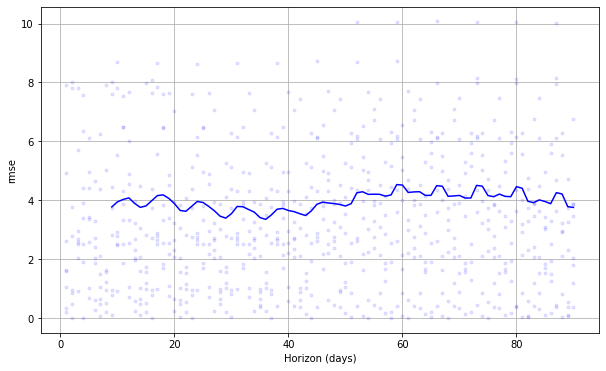

In [76]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [77]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,14.230598,3.772347,2.924307,1.750131,0.509849,0.765185,0.805556
1,10 days,15.568113,3.945645,3.110169,1.785942,0.513556,0.808827,0.777778
2,11 days,16.211340,4.026331,3.272608,2.028696,0.531365,0.899008,0.763889
3,12 days,16.637399,4.078897,3.321091,2.271505,0.567294,0.930023,0.763889
4,13 days,15.155873,3.893054,3.140135,2.188496,0.540995,0.890440,0.791667


In [78]:
df_p.rmse.mean()

3.9691040941147793

In [26]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, initial='2920 days', period='90 days', horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 8 forecasts with cutoffs between 2019-06-29 00:00:00 and 2021-03-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f60bd67c890>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 8 forecasts with cutoffs between 2019-06-29 00:00:00 and 2021-03-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f60b128e6d0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 8 forecasts with cutoffs between 2019-06-29 00:00:00 and 2021-03-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f60b42fe490>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seaso

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  3.336040
1                     0.001                     0.10  3.423662
2                     0.001                     1.00  3.402489
3                     0.001                    10.00  3.394484
4                     0.010                     0.01  3.316477
5                     0.010                     0.10  3.383315
6                     0.010                     1.00  3.376801
7                     0.010                    10.00  3.373733
8                     0.100                     0.01  3.428522
9                     0.100                     0.10  3.467666
10                    0.100                     1.00  3.474834
11                    0.100                    10.00  3.469989
12                    0.500                     0.01  3.423547
13                    0.500                     0.10  3.438148
14                    0.500                     1.00  3

In [79]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}
